In supervised learning, we just compare the predicted values with the original labels to
compute their accuracy. In unsupervised learning, we don't have any labels.  Therefore,
we need a way to measure the performance of our algorithms.

A good way to measure a clustering algorithm is by seeing how well the clusters are separated.
Are the clusters well separated? Are the datapoints in a cluster tight enough? We need a
metrics that can quantify this behavior. We will use a metric called **Silhouette Coefficient**
score. This score is defined for each datapoint. The coefficient is defined as follows:
`score = (x-y)/max(x,y)`

Here, `x` is the average distance between the current datapoint and all the other datapoints
in the same cluster; `y` is the average distance between the current datapoint and all the
datapoints in the next nearest cluster

In [1]:
# import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.cluster import KMeans

import utilities

In [2]:
# load the input data
data = utilities.load_data('data_perf.txt')

In [3]:
# In order to determine the optimal number of clusters,
# let's iterated through a range of values and see where
# it peaks.
scores = []
range_values = np.arange(2, 10)

for i in range_values:
    # Train the model
    kmeans = KMeans(init='k-means++', n_clusters=i, n_init=10)
    kmeans.fit(data)
    score = metrics.silhouette_score(data, kmeans.labels_, 
                metric='euclidean', sample_size=len(data))

    print ("Number of clusters =", i)
    print ("Silhouette score =", score)
                    
    scores.append(score)

Number of clusters = 2
Silhouette score = 0.5290397175472954
Number of clusters = 3
Silhouette score = 0.5551898802099927
Number of clusters = 4
Silhouette score = 0.5832757517829593
Number of clusters = 5
Silhouette score = 0.6582796909760834
Number of clusters = 6
Silhouette score = 0.5956331634332057
Number of clusters = 7
Silhouette score = 0.5247463625389402
Number of clusters = 8
Silhouette score = 0.46799894899232264
Number of clusters = 9
Silhouette score = 0.40249496333803925


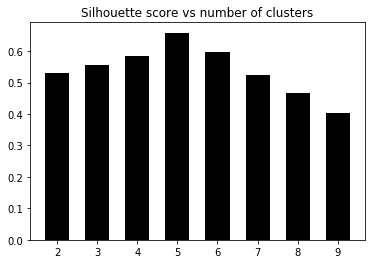

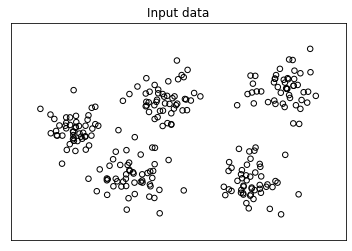

In [4]:
# Plot the graph to see where it peaked

# Plot scores
plt.figure()
plt.bar(range_values, scores, width=0.6, color='k', align='center')
plt.title('Silhouette score vs number of clusters')

# Plot data
plt.figure()
plt.scatter(data[:,0], data[:,1], color='k', s=30, marker='o', facecolors='none')
x_min, x_max = min(data[:, 0]) - 1, max(data[:, 0]) + 1
y_min, y_max = min(data[:, 1]) - 1, max(data[:, 1]) + 1
plt.title('Input data')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

plt.show()

We can visually confirm that the data in fact has five clusters. We just took the example
of a small dataset the contains five distinct clusters. This method becomes very useful
when you are dealing with a huge dataset that contains high-dimensional data that
cannot be visualized easily.